In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
img = plt.imread('1.bmp')

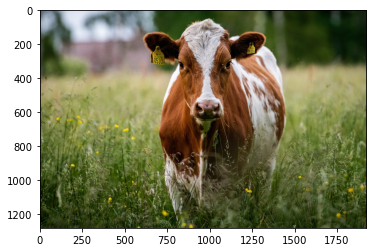

In [45]:
plt.imshow(img)
plt.show()

In [46]:
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

In [52]:
def compress(R, G, B, k):
    ur, sr, vr = np.linalg.svd(R)
    ug, sg, vg = np.linalg.svd(G)
    ub, sb, vb = np.linalg.svd(B)
    
    restore_r = np.dot(ur[:,:k], np.dot(np.diag(sr[:k]), vr[:k,:]))
    restore_g = np.dot(ug[:,:k], np.dot(np.diag(sg[:k]), vg[:k,:]))
    restore_b = np.dot(ub[:,:k], np.dot(np.diag(sb[:k]), vb[:k,:]))
    
    restore_img = np.zeros(img.shape)
    restore_img[:,:,0] = restore_r
    restore_img[:,:,1] = restore_g
    restore_img[:,:,2] = restore_b
    
    restore_img[restore_img < 0] = 0
    restore_img[restore_img > 255] = 255
    
    return restore_img

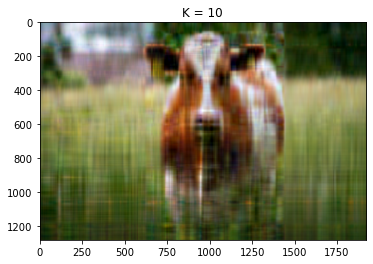

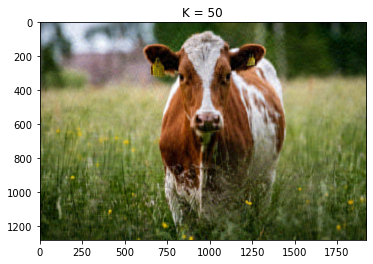

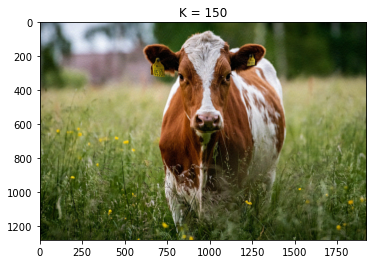

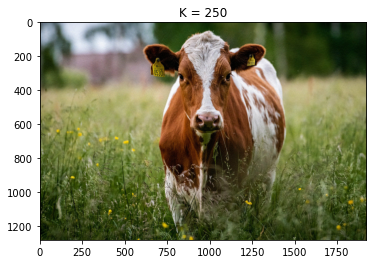

In [57]:
for k in (10, 50, 150, 250):
    compressed_img  = compress(r, g, b, k).astype(np.uint8)
    plt.imshow(compressed_img)
    plt.title('K = {}'.format(k))
    plt.show()